In [73]:
import numpy as np
import matplotlib.pyplot as plt
import sys

## Teil 1

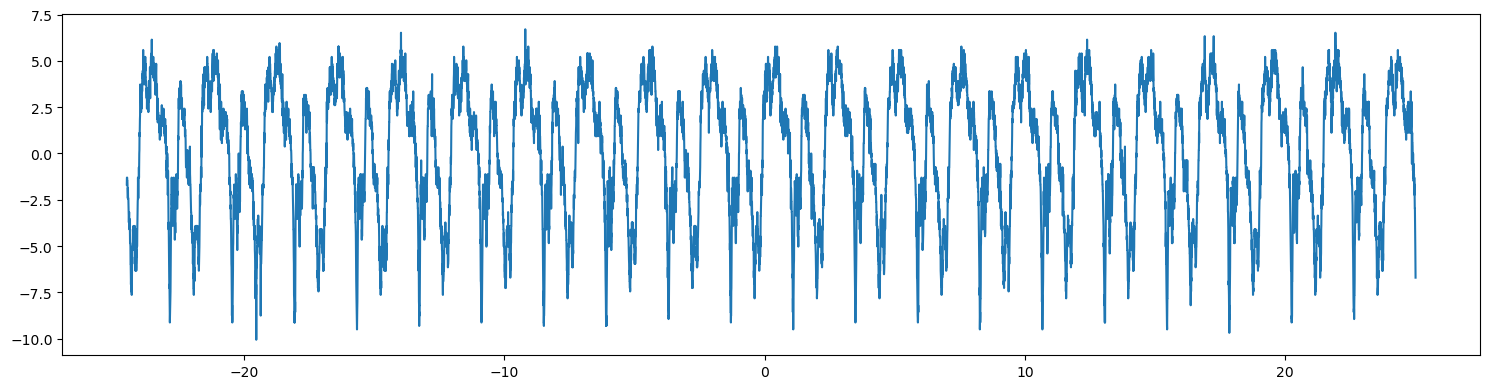

In [77]:
def readAudio(path):
    values = np.genfromtxt(fname=path,dtype=str, skip_header=103)
    valueList=[]
    for yStrings in values:
        Values=yStrings.replace(",",".").split(";")
        valueList.append(Values)
    return np.array(valueList, dtype= float)
mh4List=readAudio(path="./Files/MH4.csv")
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
plt.plot(mh4List[:,0],mh4List[:,1],label="Mundharmonika")


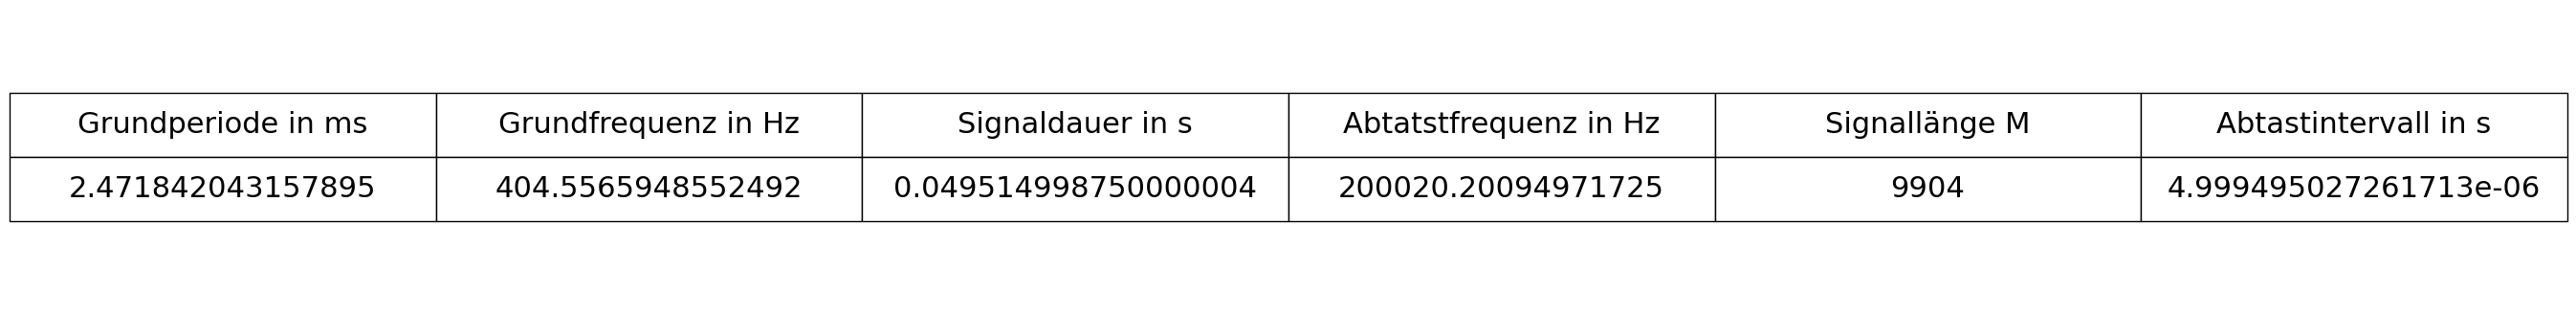

In [103]:
def minIntervall(array,start,length):
    min=[np.iinfo(np.int32).max,np.iinfo(np.int32).max]
    for i in range(start,start+length):
        if array[i,1]<min[1]:
            min=array[i]
    return min
def plotTable(array1,colLabelTupel):
    fig, ax = plt.subplots()
    ax.axis('off')
    table = ax.table(cellText=[array1], loc='center', cellLoc='center', colLabels=colLabelTupel)
    table.auto_set_font_size(False)
    table.set_fontsize(22)
    table.scale(2.3, 4)  # Adjust the size of the table
    plt.show()

firstMin=minIntervall(mh4List,0,200)
lastMin=minIntervall(mh4List,9100,len(mh4List)-9100)
grundPeriode=(lastMin[0]-firstMin[0])/19    #in ms
grundFrequenz=(1/grundPeriode)*1000         #in Hz
signalDauer=(mh4List[-1,0]-mh4List[0,0])/1000     # in s
abtastFrequenz=len(mh4List)/signalDauer     # frequenz in Hz
signalLänge=len(mh4List)
abtastIntervall=1/abtastFrequenz
plotTable([grundPeriode,grundFrequenz,signalDauer,abtastFrequenz,signalLänge,abtastIntervall],("Grundperiode in ms","Grundfrequenz in Hz","Signaldauer in s","Abtatstfrequenz in Hz","Signallänge M","Abtastintervall in s"))

## Teil 2

In [105]:
# kHz
freqs = [.1, .2, .3, .4, .5, .6, .7, .85, 1, 1.2, 1.5, 1.7, 2, 3, 4, 5, 6, 10]

def read_csv(path:str, col:int, start:int, stop:int):
    values = np.genfromtxt(fname=path,dtype=str, delimiter=";", usecols=(col), skip_header=start-1, max_rows=stop-start)
    valueList=[]
    for yStrings in values:
        if yStrings.endswith('s'):
            yStrings = yStrings[:-2]
        Values=yStrings.replace(",",".").split(";")
        valueList.append(Values)
    return np.array(valueList, dtype= float)

# takes time-deltas, returns phaseshifts
def delta2phase(delta_arrray, freqs_array=freqs):
    phasearray = []
    for i in range(len(delta_arrray)):
        phasearray.append(-delta_arrray[i] * 360/1000 * freqs_array[i]) # adjust powers of ten
    return phasearray

# check if phaseshift (adjustet to s) is smaller than 2pi (given in seconds also). If not returns False, prints Index.
def check_phases(delta_array, freqsarray=freqs)->bool:
    for i in range(2, len(delta_array)):
        if delta_array[i] / 1_000_000 > 1 / (freqsarray[i] * 1000):# adjust powers of ten
            print("Failed at Index " + str(i) + ": " + str(delta_array[i] / 1_000_000) + " , " + str(1 / (freqsarray[i]) * 1000))
            return False
    return True
# print(check_phases(delta_t))
# print(check_phases(delta_h))

# 'Tieftöner'
peak2peak_t = read_csv("./Files/teil2.csv", 2, 2, 20)
delta_t = read_csv("./Files/teil2.csv", 3, 2, 20)
# adapt ms -> µs
for i in range(0,2):
    delta_t[i] *= 1000
log_peak2peak_t = 20 * np.log10(peak2peak_t)

phases_t = delta2phase(delta_t)
# print(phases_t)

# 'Hochtöner'
peak2peak_h = read_csv("./Files/teil2.csv", 2, 22, 40)
delta_h = read_csv("./Files/teil2.csv", 3, 22, 40)
# adapt ms -> µs
for i in range(0,5):
    delta_h[i] *= 1000
log_peak2peak_h = 20 * np.log10(peak2peak_h)

phases_h = delta2phase(delta_h)


def plotter():
    pass

plt.subplot(2, 1, 1)
plt.title("Bode Diagramm \'Tieftöner\'")
plt.plot(freqs, log_peak2peak_t, 'xk')
plt.semilogx()
plt.xlabel("Frequenz $kHz^{-1}$")
plt.ylabel("Amplitudengang $dB^{-1}$")
# plt.show()
plt.subplot(2, 1, 2)
plt.semilogx(freqs, phases_t)
plt.xlabel("Frequenz $kHz^{-1}$")
plt.ylabel("Phasengang $au^{-1}$")
plt.show()

plt.subplot(2, 1, 1)
plt.title("Bode Diagramm \'Hochtöner\'")
plt.plot(freqs, log_peak2peak_h, 'xk')
plt.semilogx()
plt.xlabel("Frequenz $kHz^{-1}$")
plt.ylabel("Amplitudengang $dB^{-1}$")
# plt.show()
plt.subplot(2, 1, 2)
plt.semilogx(freqs, phases_h)
plt.xlabel("Frequenz $kHz^{-1}$")
plt.ylabel("Phasengang $au^{-1}$")
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 102: invalid start byte